In [22]:
import yfinance as yf
import pandas as pd
from resources.chart.yprint import *
from resources.chart.datasets import *
from resources.financials.profit import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
ticker = yf.Ticker('AAPL')


In [3]:
symbols = get_snp500_tickers_from_wiki()
symbols = symbols[:10]
len(symbols)


10

In [17]:
df = yf.download(symbols,period='1mo', interval='1h', group_by='ticker')

[*********************100%***********************]  10 of 10 completed


In [23]:
df['ABBV']

,Open,High,Low,Close,Adj Close,Volume
2022-05-25 09:30:00-04:00,150.360001,152.880005,149.789993,152.570007,152.570007,879100
2022-05-25 10:30:00-04:00,152.580002,152.990005,151.779999,151.839996,151.839996,495216
2022-05-25 11:30:00-04:00,151.835007,151.845001,150.639999,150.830002,150.830002,435527
2022-05-25 12:30:00-04:00,150.809998,151.445007,150.669998,150.940002,150.940002,381358
2022-05-25 13:30:00-04:00,150.939606,151.910004,150.490005,151.714996,151.714996,477237
...,...,...,...,...,...,...
2022-06-24 12:30:00-04:00,151.695007,152.339996,151.649994,152.289993,152.289993,375545
2022-06-24 13:30:00-04:00,152.259995,152.619995,151.860001,152.029999,152.029999,514462
2022-06-24 14:30:00-04:00,152.035004,152.429993,151.979996,152.285004,152.285004,766275
2022-06-24 15:30:00-04:00,152.285004,152.740005,151.820007,152.550003,152.550003,1181063


<AxesSubplot:>

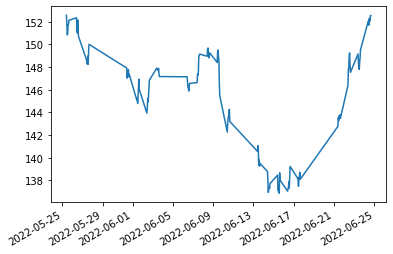

In [24]:
df['ABBV']['Close'].plot()
